In [3]:
#Checking to see if cloud instance is working :) 
print('Hello')

Hello


In [1]:
from datetime import datetime, timedelta
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx


## Data Processing and Mining with Big Query

In [9]:
#Creating a credential object from a specific key_path where the credential json file is located
from google.cloud import bigquery
from google.oauth2 import service_account
key_path='../credential/Xpring Dev Sandbox-edb2a98acf17.json'
credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

In [10]:
key_path

'../credential/Xpring Dev Sandbox-edb2a98acf17.json'

In [11]:
#Checking to see if credential file exists
import os.path
from os import path

path.exists(key_path)

True

In [12]:
def gbq_query(query,cred, query_params=None):
    """
    Run a query against Google Big Query, returning a pandas dataframe of the result.

    Parameters
    ----------
    query: str
        The query string
    cred: obj
        Credential class instance
    
    query_params: list, optional
        The query parameters to pass into the query string
    """
    client = bigquery.Client(credentials=cred)
    job_config = bigquery.QueryJobConfig()
    job_config.query_parameters = query_params
    return client.query(query, job_config=job_config).to_dataframe()

In [13]:
#Dates that query data will fall between
start_date='2019-12-15'
end_date='2019-12-27'

In [14]:
#Query and query_parameters
query = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"
AND TxnSignature IS NOT NULL
AND Destination IS NOT NULL
AND AmountXRP  IS NOT NULL
AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)


ORDER BY TimeStamp
LIMIT 1000;
"""
query_params = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]


In [16]:
xrp = gbq_query(query,credentials,query_params)
xrp

From cffi callback <function _verify_callback at 0x7f820ecae0d0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/OpenSSL/SSL.py", line 314, in wrapper
    _lib.X509_up_ref(x509)
AttributeError: module 'lib' has no attribute 'X509_up_ref'
From cffi callback <function _verify_callback at 0x7f820ecae620>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/OpenSSL/SSL.py", line 314, in wrapper
    _lib.X509_up_ref(x509)
AttributeError: module 'lib' has no attribute 'X509_up_ref'
From cffi callback <function _verify_callback at 0x7f820ecae840>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/OpenSSL/SSL.py", line 314, in wrapper
    _lib.X509_up_ref(x509)
AttributeError: module 'lib' has no attribute 'X509_up_ref'
From cffi callback <function _verify_callback at 0x7f820ed03c80>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/OpenSSL/SSL.py", line 314, in wra

TransportError: HTTPSConnectionPool(host='oauth2.googleapis.com', port=443): Max retries exceeded with url: /token (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))

In [12]:
def datetotime(col):
    #returns a list of datetime objects
    #takes in a df column
    x=[]
    for entry in col:
        x.append(datetime.strptime(entry,'%Y-%m-%d %H:%M:%S'))
    return x

In [13]:
#Replaces xrp timestamp list with a list of strings
xrp['TimeStamp']= [str(x)[:19] for x in xrp['TimeStamp']]

In [14]:
xrp['TimeStamp'][1]

'2019-12-15 00:00:01'

In [15]:
#Converts strings into datetime objects using strptime
xrp['TimeStamp']=datetotime(xrp['TimeStamp'])

In [16]:
xrp['LedgerIndex'][0]

52058308

In [17]:
xrp.loc(0)[4]

TimeStamp                                     2019-12-15 00:00:11
Account                        rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w
Destination                    rwpMvfxoodXggJ1g4qv6MWAPQqWDwQyHUW
Fee                                                            40
TxnSignature    3045022100F4BEBE96EF6610512BD07D789C1E2629342F...
AmountXRP                                              1162250116
LedgerIndex                                              52058311
Name: 4, dtype: object

## CloseTime Distribution

In [18]:
start_date='2019-12-15'
end_date='2019-12-27'

In [19]:
query2 = """
Select *, TIMESTAMP(CloseTime) as `TimeStamp`
From
xrpledgerdata.fullhistory.ledgers

Where TIMESTAMP(CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(CloseTime) <=TIMESTAMP(@end_date)
Order by LedgerIndex
LIMIT 100000

"""
query_params2 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]


In [20]:
ledgerdf = gbq_query(query2,credentials,query_params2)
ledgerdf

,LedgerIndex,hash,CloseTime,CloseTimeTimestamp,CloseTimeHuman,TotalCoins,ParentHash,AccountHash,TransactionHash,TimeStamp
0,52058308,9A1BFC911AB308782606348E63986DAFA8EE111689702B...,2019-12-15 00:00:00,629686800,2019-Dec-15 01:00:00.000000000,99991147585829680,2C653C7E116AEDD3DC0FEDB98F400D5DA11D07DCAB6298...,7B1F69E60321EFA03CE917CBFC119B375612315BF93F03...,DA2719A56038A9B5603E38D35AD4B6C3FA7119272E41C3...,2019-12-15 00:00:00+00:00
1,52058309,5D9B277B92014EA116EF15935670F3BFAE76C93DBE17BC...,2019-12-15 00:00:01,629686801,2019-Dec-15 01:00:01.000000000,99991147585735540,9A1BFC911AB308782606348E63986DAFA8EE111689702B...,3BC6B3D00C4D770A65CC7903241570EC3DBEC44BD874AD...,58821251ACF2C4D886B26BBB7BF4197283D748D2E3C58F...,2019-12-15 00:00:01+00:00
2,52058310,43A871FE577FC1E710A048E4E7381A0F3393D244672CE2...,2019-12-15 00:00:10,629686810,2019-Dec-15 01:00:10.000000000,99991147585531540,5D9B277B92014EA116EF15935670F3BFAE76C93DBE17BC...,A532CED21EAA41AC33B21597FDAD08F0B822E1388C3D00...,A647B66ACEAD89968D94B95A305E6B48A0E751115BBCE3...,2019-12-15 00:00:10+00:00
3,52058311,E8171001FCBC6206D56F73921715F936500EEF6B3A480C...,2019-12-15 00:00:11,629686811,2019-Dec-15 01:00:11.000000000,99991147585459420,43A871FE577FC1E710A048E4E7381A0F3393D244672CE2...,6C88AAB4CB8B19A7B96819F73D4C6E05CF8AD40B1A1F6D...,C2AE4B34ABBF387EBF4105686F0AE9BC77D01058397677...,2019-12-15 00:00:11+00:00
4,52058312,B59E4CABDDD6A5147360FAF018608671DD8A417BD5BFB2...,2019-12-15 00:00:12,629686812,2019-Dec-15 01:00:12.000000000,99991147585458560,E8171001FCBC6206D56F73921715F936500EEF6B3A480C...,302D92CBC5C5CB4240A101B682CC62F3C0A4C708295ECD...,8070F8A573C330088C023591543FA98E49219A6CCE3928...,2019-12-15 00:00:12+00:00
...,...,...,...,...,...,...,...,...,...,...
99995,52158303,4826741EBB2F579DFD6A5409C5BF15CA8CE786537E86FB...,2019-12-19 13:36:20,630081380,2019-Dec-19 14:36:20.000000000,99991140203170610,7E4CF63C10E921503762863B4944F60C06B47CA813F970...,92C5EA812E709C326B162AD72566FEF1F7259997034DB4...,5D3B05FF59204E01AB84E41CC49ECC054C4701A19860FF...,2019-12-19 13:36:20+00:00
99996,52158304,BF0400FA4FF9475F3BAC6B9191E4E0A0F7138357BE195E...,2019-12-19 13:36:21,630081381,2019-Dec-19 14:36:21.000000000,99991140203168770,4826741EBB2F579DFD6A5409C5BF15CA8CE786537E86FB...,25E04AC8AFAC48C82E788B2C0C0C80F4D2DD140BA3E2A0...,0AECC03C85A1CCBBB53B245FBEDD7BBEFC25B0AB8FC017...,2019-12-19 13:36:21+00:00
99997,52158305,EE4466E1D2B4D5CBBFA56353CF54BEEF742C85FF2BCD88...,2019-12-19 13:36:30,630081390,2019-Dec-19 14:36:30.000000000,99991140203166700,BF0400FA4FF9475F3BAC6B9191E4E0A0F7138357BE195E...,BD25E1187788B78A864D04A6137816EE3593D854897DA1...,9286D9539699F33197174375FC9F0AB55FF33960D2285F...,2019-12-19 13:36:30+00:00
99998,52158306,E83A53CFDBAF54BFD8F60A3A4BCC07ACABD594ED8F837F...,2019-12-19 13:36:31,630081391,2019-Dec-19 14:36:31.000000000,99991140203165010,EE4466E1D2B4D5CBBFA56353CF54BEEF742C85FF2BCD88...,1E23BC1F9271E5C5CC9CC63C35DD2CDE6320AE86CEF4A8...,C698333CA77428CBD3BBC68835DA32FFADD9D3F61C5AE9...,2019-12-19 13:36:31+00:00


In [21]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r

In [22]:
def get_closetime_dist(data):
    """
    Calculate closetime for each ledger based on a ledger dataframe passed

    Parameters
    ----------
    data: dataframe
        The dataframe of ledgers that is being analyzed
        Dataframe of with rows n
        
    Return 
    ---------
    Returns dictionary with keys that are n-1 ledgers from data 
    and values that are the closetime in seconds
    """
    UniqueLedgerIndex=np.unique(data['LedgerIndex'])
    closetimezeros=[0]*(len(UniqueLedgerIndex)-1)
    dicCloseTime = {k:v for k,v in zip(UniqueLedgerIndex,closetimezeros)}
    
    curledger=data['LedgerIndex'][0]
    curtime=data['TimeStamp'][0]
    
    
    for index,row in data.iterrows():
        print('Working')
        if row['LedgerIndex']!=curledger:
            dicCloseTime[row['LedgerIndex']]=(row['TimeStamp']-curtime).total_seconds()
            curledger=row['LedgerIndex']
            curtime=row['TimeStamp']
        else:
            None
    foo=removekey(dicCloseTime,data['LedgerIndex'][0])
    return foo

        
        
    

In [31]:
def plot_close_time(dic):
    plt.hist(dic.values(),bins=100, color='g')
    plt.title('Distribution of CloseTime')
    plt.xlabel('CloseTime (seconds)')
    plt.ylabel('Frequency')

    plt.show()

In [27]:
Closetime_dictionary=get_closetime_dist(ledgerdf)


In [33]:
Closetime_dictionary

{52058309: 1.0,
 52058310: 9.0,
 52058311: 1.0,
 52058312: 1.0,
 52058313: 8.0,
 52058314: 1.0,
 52058315: 9.0,
 52058316: 1.0,
 52058317: 1.0,
 52058318: 8.0,
 52058319: 1.0,
 52058320: 9.0,
 52058321: 1.0,
 52058322: 1.0,
 52058323: 8.0,
 52058324: 1.0,
 52058325: 9.0,
 52058326: 1.0,
 52058327: 1.0,
 52058328: 8.0,
 52058329: 1.0,
 52058330: 9.0,
 52058331: 1.0,
 52058332: 1.0,
 52058333: 8.0,
 52058334: 1.0,
 52058335: 1.0,
 52058336: 8.0,
 52058337: 1.0,
 52058338: 9.0,
 52058339: 1.0,
 52058340: 1.0,
 52058341: 8.0,
 52058342: 1.0,
 52058343: 9.0,
 52058344: 1.0,
 52058345: 1.0,
 52058346: 8.0,
 52058347: 1.0,
 52058348: 9.0,
 52058349: 1.0,
 52058350: 1.0,
 52058351: 8.0,
 52058352: 1.0,
 52058353: 9.0,
 52058354: 1.0,
 52058355: 1.0,
 52058356: 8.0,
 52058357: 1.0,
 52058358: 1.0,
 52058359: 8.0,
 52058360: 1.0,
 52058361: 9.0,
 52058362: 1.0,
 52058363: 1.0,
 52058364: 8.0,
 52058365: 1.0,
 52058366: 9.0,
 52058367: 1.0,
 52058368: 1.0,
 52058369: 8.0,
 52058370: 1.0,
 5205837

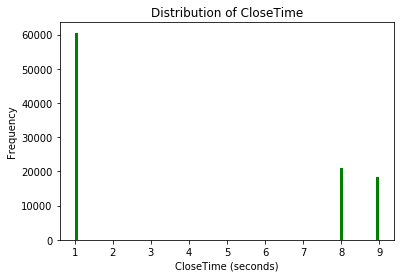

In [32]:
plot_close_time(Closetime_dictionary)

In [ ]:
Close

## Calculating Sliding Window Account Balances

In [22]:
#Creating a merged a numpy array of unique account and destination hashes
UniqueAccount=np.unique(xrp['Account'])
UniqueDestination=np.unique(xrp['Destination'])
UniqueHash=np.unique(np.concatenate([UniqueDestination, UniqueAccount]))

In [23]:
#Creating a dictionary with account hashes as keys and account balances initialized at 0 as the values
#The value is an array of length 24 for each increment of time window that will be computed ()
UniqueHashList=UniqueHash.tolist()
listofzeros = [[0] *24 ]*len(UniqueHashList)
dicAccBal = {k:v for k,v in zip(UniqueHashList,listofzeros)}



In [24]:
#for each unique account hash
for each in UniqueHashList:
    #looking at 1 hour time windows from 0-23 hours from startime (which is the first rows time, currently static)
    for i in range(1,25):
        starttime = xrp['TimeStamp'][0]
        endtime = timedelta(hours = i+1 ) + starttime
        #iterate through each transaction
        for index, row in xrp.iterrows():
            #Checking if the transaction's timestamp is within time window specified by starttime and endtime
            if (row['TimeStamp'] < endtime) & (row['TimeStamp'] > starttime):
                #Adding account balances to respective dictionary balance
                dicAccBal[row['Account']][i] += (-1) * (row['AmountXRP'])
                dicAccBal[row['Destination']][i] += (1) * (row['AmountXRP'])

IndexError: list index out of range

## Exploring NetworkX Package as a visualization tool

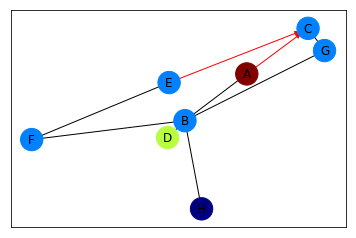

In [25]:
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

## Feature Engineering for Clustering

### Querying dataset with Transaction Type to first do some EDA

In [23]:
#Query and query_parameters
query3 = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex,t.TransactionType
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"

AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)


ORDER BY TimeStamp
LIMIT 10000;
"""
query_params3 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]


In [24]:
xrp3 = gbq_query(query3,credentials,query_params3)
xrp3

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType
0,2019-12-15 00:00:00+00:00,rhJYdAAiZPJpztnu13pHAATi4gsEi3Rf28,None,12,304402203F5B78E27891BDA989407C70BF0516E887644D...,NaN,52058308,OfferCreate
1,2019-12-15 00:00:00+00:00,r4zaMHE5GG4zuD3CaqjNbfgo3yuFoKG37Q,None,12,30450221009A74CC0FCE245409DE658B3527DFEFD743E4...,NaN,52058308,OfferCreate
2,2019-12-15 00:00:00+00:00,rhJYdAAiZPJpztnu13pHAATi4gsEi3Rf28,None,12,3045022100FF1D1FBC0970606AE991FC712A7BC3423477...,NaN,52058308,OfferCreate
3,2019-12-15 00:00:00+00:00,rJnDtS59KUSWKsddzVymUCLZPjUPPrRLzm,rM75cCsWqxQnHSPkyuc1HhYq9oBJQFgdMN,12,304402201F06F7B65558340848D7BB398F2959441A5534...,NaN,52058308,Payment
4,2019-12-15 00:00:00+00:00,rDzTZxa7NwD9vmNf5dvTbW4FQDNSRsfPv6,None,12,304502210098002E509DD8F2D733CA367500E8C554F8EB...,NaN,52058308,OfferCreate
...,...,...,...,...,...,...,...,...
9995,2019-12-15 00:12:00+00:00,rMBzp8CgpE441cp5PVyA9rpVV7oT8hP3ys,None,10,3044022014908A0F158B44AA537DB2DBA4EFED62CCBE94...,NaN,52058491,OfferCreate
9996,2019-12-15 00:12:00+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3044022005B4CDD0EDC3AF11DF10F755FBC5394E46BA12...,NaN,52058491,OfferCreate
9997,2019-12-15 00:12:00+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,3045022100EC977D02C752BB51914972F79530198FF6F1...,NaN,52058491,OfferCreate
9998,2019-12-15 00:12:00+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,304402201DD10D9B64B97A5A220A213CD6B17FE24A28E7...,NaN,52058491,OfferCreate


In [25]:
def get_txntypedist(data):
    return data['TransactionType'].value_counts()
    

In [26]:
get_txntypedist(xrp3)

OfferCreate    7536
Payment        2163
OfferCancel     294
AccountSet        7
Name: TransactionType, dtype: int64

In [48]:
xrp3.groupby('LedgerIndex')['TransactionType'].value_counts()

LedgerIndex  TransactionType
52058308     OfferCreate        27
             Payment             6
             OfferCancel         1
52058309     OfferCreate        44
             Payment            30
                                ..
52058490     OfferCreate        41
             Payment             4
52058491     OfferCreate        48
             OfferCancel         2
             Payment             1
Name: TransactionType, Length: 518, dtype: int64

In [31]:
def get_txnsum(data):
    return data.groupby(['Account','Destination']).sum()

In [32]:
get_txnsum(xrp3)

Fee  \
Account                            Destination                                 
r34iHT6Gziux5fH8r8Aoa6ND3nr36ZuWmj rMgeFZdvqkmyVyKzoBNy2XeWH8xPKbyKUD   7520   
r369aVmXp8nWrkDEBVHX5fiy1jPeb77LRh r9oAVjmfeFJ7AiMyvSxjF1CpuWkocc79JT   1000   
                                   rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh   1000   
                                   rJGEBwYTKZKcaZgvoY6bf4cVr2AbDjhhUK   1000   
                                   rwqn1TbFgabn5iY33CKKcuzSNaJ5RfhvHR   1000   
...                                                                      ...   
rwsQjcR9gkNRsVpX6pXpErnK7ewaqgEe59 rsi42LZ7WztciwBeP1sCwxXuRunRHFvcRo  14478   
rxQBwm8spKziiJscBhuFisGVAFBgTEE4z  rL2SpzwrCZ4N2BaPm88pNGGHkPLzejZgB8  13129   
ryBANkk28Mj71jRKAkt13U1X9ubztsGWZ  r9Eb2tRiUs39MEycVAQfEy7QpBePH4WVPp     12   
                                   rwU8rAiE2eyEPz3sikfbHuqCuiAtdXqa2v   7707   
ryz7cmCmwomdiCGSraeRHaxWjmHmfa5Kh  rEu9cWnsfrb76y1trRX5ioHRXyZLwhL3sT  26828   

                                                                          AmountXRP  \
Account                            Destination                                        
r34iHT6Gziux5fH8r8Aoa6ND3nr36ZuWmj rMgeFZdvqkmyVyKzoBNy2XeWH8xPKbyKUD  0.000000e+00   
r369aVmXp8nWrkDEBVHX5fiy1jPeb77LRh r9oAVjmfeFJ7AiMyvSxjF1CpuWkocc79JT  5.490000e+07   
                                   rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh  2.699044e+08   
                                   rJGEBwYTKZKcaZgvoY6bf4cVr2AbDjhhUK  1.188790e+10   
                                   rwqn1TbFgabn5iY33CKKcuzSNaJ5RfhvHR  1.981096e+09   
...                                                                             ...   
rwsQjcR9gkNRsVpX6pXpErnK7ewaqgEe59 rsi42LZ7WztciwBeP1sCwxXuRunRHFvcRo  0.000000e+00   
rxQBwm8spKziiJscBhuFisGVAFBgTEE4z  rL2SpzwrCZ4N2BaPm88pNGGHkPLzejZgB8  0.000000e+00   
ryBANkk28Mj71jRKAkt13U1X9ubztsGWZ  r9Eb2tRiUs39MEycVAQfEy7QpBePH4WVPp  7.432574e+07   
                                   rwU8rAiE2eyEPz3sikfbHuqCuiAtdXqa2v  1.572878e+10   
ryz7cmCmwomdiCGSraeRHaxWjmHmfa5Kh  rEu9cWnsfrb76y1trRX5ioHRXyZLwhL3sT  0.000000e+00   

                                                                       LedgerIndex  
Account                            Destination                                      
r34iHT6Gziux5fH8r8Aoa6ND3nr36ZuWmj rMgeFZdvqkmyVyKzoBNy2XeWH8xPKbyKUD    312350380  
r369aVmXp8nWrkDEBVHX5fiy1jPeb77LRh r9oAVjmfeFJ7AiMyvSxjF1CpuWkocc79JT     52058322  
                                   rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh     52058461  
                                   rJGEBwYTKZKcaZgvoY6bf4cVr2AbDjhhUK     52058337  
                                   rwqn1TbFgabn5iY33CKKcuzSNaJ5RfhvHR     52058483  
...                                                                            ...  
rwsQjcR9gkNRsVpX6pXpErnK7ewaqgEe59 rsi42LZ7WztciwBeP1sCwxXuRunRHFvcRo    312350366  
rxQBwm8spKziiJscBhuFisGVAFBgTEE4z  rL2SpzwrCZ4N2BaPm88pNGGHkPLzejZgB8    312350438  
ryBANkk28Mj71jRKAkt13U1X9ubztsGWZ  r9Eb2tRiUs39MEycVAQfEy7QpBePH4WVPp     52058463  
                                   rwU8rAiE2eyEPz3sikfbHuqCuiAtdXqa2v     52058310  
ryz7cmCmwomdiCGSraeRHaxWjmHmfa5Kh  rEu9cWnsfrb76y1trRX5ioHRXyZLwhL3sT    364408776  

[371 rows x 3 columns]

In [37]:
def get_txnavg(data):
    return data.groupby(['Account','Destination']).mean()

In [40]:
get_txnavg(xrp3)[['Fee','AmountXRP']]

Fee  \
Account                            Destination                                       
r34iHT6Gziux5fH8r8Aoa6ND3nr36ZuWmj rMgeFZdvqkmyVyKzoBNy2XeWH8xPKbyKUD  1253.333333   
r369aVmXp8nWrkDEBVHX5fiy1jPeb77LRh r9oAVjmfeFJ7AiMyvSxjF1CpuWkocc79JT  1000.000000   
                                   rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh  1000.000000   
                                   rJGEBwYTKZKcaZgvoY6bf4cVr2AbDjhhUK  1000.000000   
                                   rwqn1TbFgabn5iY33CKKcuzSNaJ5RfhvHR  1000.000000   
...                                                                            ...   
rwsQjcR9gkNRsVpX6pXpErnK7ewaqgEe59 rsi42LZ7WztciwBeP1sCwxXuRunRHFvcRo  2413.000000   
rxQBwm8spKziiJscBhuFisGVAFBgTEE4z  rL2SpzwrCZ4N2BaPm88pNGGHkPLzejZgB8  2188.166667   
ryBANkk28Mj71jRKAkt13U1X9ubztsGWZ  r9Eb2tRiUs39MEycVAQfEy7QpBePH4WVPp    12.000000   
                                   rwU8rAiE2eyEPz3sikfbHuqCuiAtdXqa2v  7707.000000   
ryz7cmCmwomdiCGSraeRHaxWjmHmfa5Kh  rEu9cWnsfrb76y1trRX5ioHRXyZLwhL3sT  3832.571429   

                                                                          AmountXRP  
Account                            Destination                                       
r34iHT6Gziux5fH8r8Aoa6ND3nr36ZuWmj rMgeFZdvqkmyVyKzoBNy2XeWH8xPKbyKUD           NaN  
r369aVmXp8nWrkDEBVHX5fiy1jPeb77LRh r9oAVjmfeFJ7AiMyvSxjF1CpuWkocc79JT  5.490000e+07  
                                   rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh  2.699044e+08  
                                   rJGEBwYTKZKcaZgvoY6bf4cVr2AbDjhhUK  1.188790e+10  
                                   rwqn1TbFgabn5iY33CKKcuzSNaJ5RfhvHR  1.981096e+09  
...                                                                             ...  
rwsQjcR9gkNRsVpX6pXpErnK7ewaqgEe59 rsi42LZ7WztciwBeP1sCwxXuRunRHFvcRo           NaN  
rxQBwm8spKziiJscBhuFisGVAFBgTEE4z  rL2SpzwrCZ4N2BaPm88pNGGHkPLzejZgB8           NaN  
ryBANkk28Mj71jRKAkt13U1X9ubztsGWZ  r9Eb2tRiUs39MEycVAQfEy7QpBePH4WVPp  7.432574e+07  
                                   rwU8rAiE2eyEPz3sikfbHuqCuiAtdXqa2v  1.572878e+10  
ryz7cmCmwomdiCGSraeRHaxWjmHmfa5Kh  rEu9cWnsfrb76y1trRX5ioHRXyZLwhL3sT           NaN  

[371 rows x 2 columns]

In [46]:
xrp3.groupby('LedgerIndex')['TransactionType'].apply(lambda x: 100 * x / float(x.sum()))

ValueError: could not convert string to float: 'OfferCreateOfferCreateOfferCreatePaymentOfferCreateOfferCreateOfferCreateOfferCreateOfferCancelOfferCreatePaymentOfferCreatePaymentOfferCreateOfferCreatePaymentPaymentOfferCreateOfferCreateOfferCreatePaymentOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreateOfferCreate'

In [44]:
xrp3.groupby('Account')['AmountXRP']

In [2]:
from sspipe import p, px

In [54]:
xrp3.groupby('LedgerIndex')['TransactionType'].value_counts()

LedgerIndex  TransactionType
52058308     OfferCreate        27
             Payment             6
             OfferCancel         1
52058309     OfferCreate        44
             Payment            30
                                ..
52058490     OfferCreate        41
             Payment             4
52058491     OfferCreate        48
             OfferCancel         2
             Payment             1
Name: TransactionType, Length: 518, dtype: int64

In [71]:
def txn_type_count_by_ledger(data):
    return data | px.groupby('LedgerIndex') | px['TransactionType'] | px.value_counts() 

In [75]:
txn_type_count_by_ledger(xrp3).groupby('LedgerIndex')

SyntaxError: unexpected EOF while parsing (<ipython-input-75-0267988d7dd4>, line 1)

In [76]:
sum([1, 4, 3] | traverse)

NameError: name 'traverse' is not defined

In [ ]:
def txn_type_percentages_by_ledger(data):
    return data | px.groupby('LedgerIndex') | px['TransactionType'] | px.value_counts() | 100*px/

In [79]:
xrp3.groupby('LedgerIndex')

LedgerIndex
52058308    OfferCreateOfferCreateOfferCreatePaymentOfferC...
52058309    OfferCreatePaymentOfferCreatePaymentPaymentOff...
52058310    PaymentPaymentPaymentPaymentOfferCreatePayment...
52058311    OfferCreateOfferCreateOfferCreatePaymentPaymen...
52058312    OfferCreateOfferCreateOfferCreatePaymentPaymen...
                                  ...                        
52058487    OfferCreatePaymentPaymentOfferCreateOfferCreat...
52058488    OfferCreateOfferCreateOfferCancelOfferCreateOf...
52058489    OfferCancelOfferCancelOfferCreateOfferCreateOf...
52058490    OfferCreateOfferCreateOfferCreateOfferCreateOf...
52058491    OfferCreateOfferCreateOfferCreateOfferCreateOf...
Name: TransactionType, Length: 184, dtype: object